# Classification of digits


This notebook shows how to create a neural network with Keras for classifying numbers. This material is taken from [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python).

In [2]:
## imports
from __future__ import print_function
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import rcParams


def load_rcparams(figsize=None, for_paper=False):
    """
    Load a custom rcParams dictionary
    """
    rcParams['axes.titlesize']  = 14            # title
    rcParams['axes.labelsize']  = 12            # $f_i$ labels
    rcParams['xtick.color']     = "#474747"     # ticks gray color
    rcParams['ytick.color']     = "#474747"     # ticks gray color
    rcParams['xtick.labelsize'] = 10            # ticks size
    rcParams['ytick.labelsize'] = 10            # ticks size
    rcParams['legend.fontsize'] = 12            # legend
    rcParams['legend.fontsize'] = 12            # legend
                
    if isinstance(figsize, tuple):
        rcParams['figure.figsize'] = figsize    # figsize, common values: (12, 5), (8, 6)
    
def print_matrix(vector):
    for row in vector:
        print(" ".join(["%.4f" % val for val in row]))
        
def print_int_matrix(vector):
    for row in vector:
        print(" ".join(["%3d" % val for val in row]))

# 1. Check dataset

This block loads the dataset:

In [3]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` and `train_labels` comprises the training set. The model will learn from that set. On the other hand, `test_images` and `test_labels` comprises the test set. We evalute the performance of the model with the test set. Below, we display some properties of the dataset. Note that the images are encoded as Numpy `uint8` arrays:

In [4]:
print("train_images shape (%s)" % (train_images.shape,))
print("test_images shape  (%s)" % (test_images.shape,))
print("images dtype       %s" % train_images.dtype) 
print("")

print("train_labels shape (%s)" % (train_labels.shape,))
print("test_labels shape  (%s)" % (test_labels.shape,))
print("labels dtype       %s" % train_labels.dtype) 

train_images shape ((60000, 28, 28))
test_images shape  ((10000, 28, 28))
images dtype       uint8

train_labels shape ((60000,))
test_labels shape  ((10000,))
labels dtype       uint8


We have 60,000 training samples and 10,000 samples for testing. Notice that the data type of both patterns and labels is `uint8`. Below we inspect some examples from the dataset. It is recommeded to inspect samples from the training set only. Let's take a look at one sample:

In [4]:
sample_id = 5                               # choose a sample from train_images
sample_image = train_images[sample_id]      # shape (28, 28)
sample_label = train_labels[sample_id]      # scalar

print_int_matrix(sample_image)

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100 122   7   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252 252 146   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211 252 232  40   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 216  31  37 252 252  60   0   0   0   0   0 

As it can be seen, that block roughly shows a '1'. Now, compare it with `imshow`:

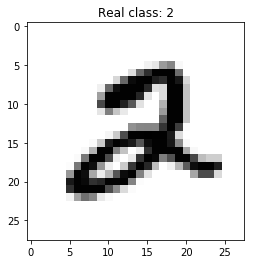

In [5]:
%matplotlib inline
sample_id = 5                               # choose a sample from train_images
sample_image = train_images[sample_id]      # shape (28, 28)
sample_label = train_labels[sample_id]      # scalar

plt.title("Real class: %d" % sample_label)
plt.imshow(sample_image, cmap=plt.cm.binary)
plt.show()

Let's show a few more examples:

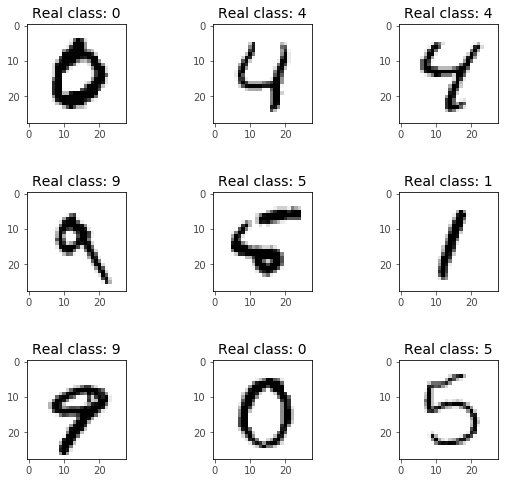

In [7]:
%matplotlib inline

# choose some ids
sample_ids = [3, 4, 6,
             7, 8, 5,
             9, 13, 53]

load_rcparams((10, 8))

fig = plt.figure()
axes = (fig.add_subplot(331), fig.add_subplot(332), fig.add_subplot(333),
       fig.add_subplot(334), fig.add_subplot(335), fig.add_subplot(336),
       fig.add_subplot(337), fig.add_subplot(338), fig.add_subplot(339),)

for ax, sample_id in zip(axes, sample_ids):
    
    sample_image = test_images[sample_id]      # shape (28, 28)
    sample_label = test_labels[sample_id]      # scalar

    ax.set_title("Real class: %d" % sample_label)
    ax.imshow(sample_image, cmap=plt.cm.binary)
    
# adjust margins
fig.subplots_adjust(
                    hspace=0.7,
                    wspace=0.0
                    )
plt.show()

# 2. Preprocessing

The author recommends to reshape the data into `float32` vectors of shape `(28*28, )` in the range `[0, 1]`.

In [8]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# data preprocessing
x_train_images = train_images.reshape((60000, 28*28))
x_train_images = x_train_images.astype("float32") / 255

x_test_images = test_images.reshape((10000, 28*28))
x_test_images = x_test_images.astype("float32") / 255

Check the change:

In [10]:
print("before preprocessing (dtype: %s,   shape: %s, min: %.2f, max: %.2f)"  % (  train_images[0].dtype,   train_images.shape,   train_images.min(),   train_images.max()))
print("after  preprocessing (dtype: %s, shape: %s,    min: %.2f, max: %.2f)" % (x_train_images[0].dtype, x_train_images.shape, x_train_images.min(), x_train_images.max()))

before preprocessing (dtype: uint8,   shape: (60000, 28, 28), min: 0.00, max: 255.00)
after  preprocessing (dtype: float32, shape: (60000, 784),    min: 0.00, max: 1.00)


Notice that both **shape and dtype** changed. Now, each sample is a `float32` vector of shape `(784, )`.

From Chapter 4:

> [...] you should format your data in a way that can be fed into a machine-learning model -- here, we'll assume a deep neural network:
> - Your data should be formatted as tensors
> - The values taken by these tensors should usuallu be scaled to small values: for example, in the [-1, 1] range or [0, 1] range

The author also suggests to categorically encode the labels using *one-hot encoding*:

In [11]:
# prepare labels
y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)

Check the change:

In [12]:
print("label           ", train_labels[0])
print("encoded label   ", y_train_labels[0])

label            5
encoded label    [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 3. Create neural network

In [14]:
# network arquitecture
network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28*28, )))
network.add(layers.Dense(10, activation="softmax"))

# compilation
network.compile(optimizer="rmsprop",
                loss="categorical_crossentropy",
                metrics=["accuracy"],                
                )

# 4. Training and testing

In the following, we train the neural network. In order to analyze the convergence of the network, the function `fit` returns a `History` object. 

In [15]:
history = network.fit(x_train_images, y_train_labels, epochs=5, batch_size=128)

W1022 00:38:46.512513 140250064267008 deprecation.py:323] From /home/auraham/.virtualenvs/keras/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1022 00:38:46.582390 140250064267008 deprecation_wrapper.py:119] From /home/auraham/.virtualenvs/keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.2531 - acc: 0.9266
Epoch 2/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.1038 - acc: 0.9694
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0685 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.0499 - acc: 0.9844
Epoch 5/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.0375 - acc: 0.9885


Save it:

In [16]:
# save model (the same model for loss: 0.0098 - acc: 0.9972 when calling network.fit())
network.save("network.h5")

In [17]:
# load model
from keras.models import load_model
model = load_model("network.h5")

In [19]:
# print model  (MOVER ARRIBA Y CREAR UNA CNN)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In Chapter 3, the author shows how to plot the training and validation loss. In this example, we plot the training loss only becasue we did not employ a validation set. Before going any further, analyze `history` first:

In [20]:
print(history)
print(history.history)
print(history.history.keys())

{'acc': [0.9266000000317891, 0.96935, 0.9793666666666667, 0.9843833333333334, 0.9885333333015441], 'loss': [0.2531272573630015, 0.1038005812411507, 0.06848305908540885, 0.049868787948290506, 0.03749101301630338]}
dict_keys(['acc', 'loss'])


`history` contains a dictionary also called `history`. As it can be seen, it contains two keys:

- `acc`, the metric given when contructing the network
- `loss`, the value of the loss function

Notice that each entry in that dictionary contains a list with the values of the corresponding indicator for each epoch. Let's use them to create a plot.

-----

**Note** in the book, `history.history` contains four keys: `acc`, `loss`, `val_acc`,  and `val_loss`. The last two keys are returned when a validation set is given.

-----


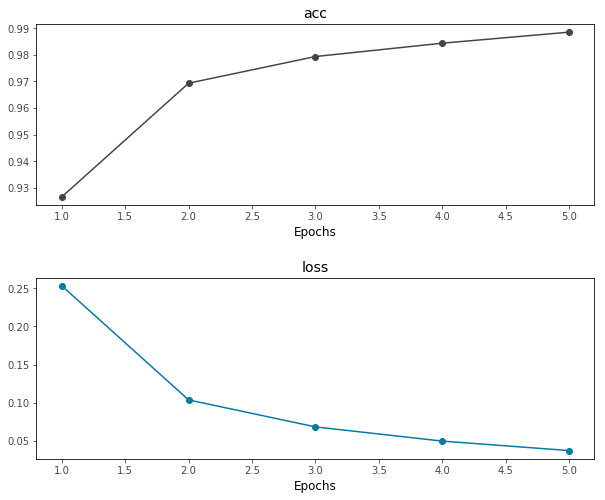

In [21]:
%matplotlib inline

load_rcparams((10, 8))

fig = plt.figure()
axes = (fig.add_subplot(211), fig.add_subplot(212))


hist_dict = history.history
indicators = ("acc", "loss")
colors = ["#454545", "#007ca5", "#A91458"]


for i, ax, indicator in zip((0, 1), axes, indicators):
    
    ax.cla()
    
    y = hist_dict[indicator]
    x = np.arange(1, len(y)+1)
    
    ax.set_title(indicator)
    ax.set_xlabel("Epochs")
    ax.plot(x, y, marker="o", c=colors[i])
    
# adjust margins
fig.subplots_adjust(
                    hspace=0.4,
                    )
    
plt.show()

As expected, we can see from these figures than the accuracy of the network improves as the training progresses. Remember that these results are from the training data itself, not from the testing data. Thus, they only provide a quick overview of the performance of the network, but not about its ability to generalize (i.e., classify unseen samples correctly).

In [22]:
# history from network
hist_dict = history.history

# evaluate performance
test_loss, test_acc = network.evaluate(x_test_images, y_test_labels)

print("train loss: %.4f" % hist_dict["loss"][-1])   # loss in the last epoch
print("test  loss: %.4f" % test_loss)
print("difference: %.4f" % (np.abs(hist_dict["loss"][-1] - test_loss,)))
print("")

print("train acc:  %.4f" % hist_dict["acc"][-1])    # accuracy in the last epoch
print("test  acc:  %.4f" % test_acc)
print("difference: %.4f" % (hist_dict["acc"][-1] - test_acc),)

10000/10000 [==============================] - 0s 44us/step
train loss: 0.0375
test  loss: 0.0665
difference: 0.0290

train acc:  0.9885
test  acc:  0.9791
difference: 0.0094


From results, **the accuracy on the test set is 98.2%** whereas in the training set is 99.6%. That almost 1.5% of difference.


----

**Note** These results may differ from yours (or even after running the same code in the same machine) because of the use of GPU. In summary, the use of GPU avoids reproducibility of results. See [this](https://stackoverflow.com/questions/50659482/why-cant-i-get-reproducible-results-in-keras-even-though-i-set-the-random-seeds) and [this](https://stackoverflow.com/questions/55200768/structuring-a-keras-project-to-achieve-reproducible-results-in-gpu/57121117#57121117) for more details.

----

Now that the neural network is trained, we can use it to predict/classify unseen samples:


## DEMO

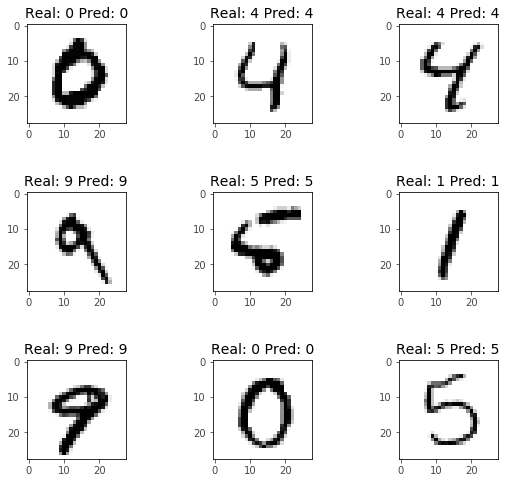

In [23]:
# AGREGAR MODEL_LOAD


%matplotlib inline

# choose some ids
sample_ids = [3, 4, 6,
             7, 8, 5,
             9, 13, 53]
# prediction
predictions = network.predict(x_test_images[sample_ids])

n = len(sample_ids)
indices = np.arange(n, dtype=int)


# plot
load_rcparams((10, 8))

fig = plt.figure()
axes = (fig.add_subplot(331), fig.add_subplot(332), fig.add_subplot(333),
       fig.add_subplot(334), fig.add_subplot(335), fig.add_subplot(336),
       fig.add_subplot(337), fig.add_subplot(338), fig.add_subplot(339),)

for pred_id, ax, sample_id in zip(indices, axes, sample_ids):
    
    sample_image = test_images[sample_id]      # shape (28, 28)
    sample_label = test_labels[sample_id]      # scalar (real class)

    pred_onehot  = predictions[pred_id]        # prediction in one-hot encoding
    pred_label   = pred_onehot.argmax()        # scalar (predicted class) 
    
    ax.set_title("Real: %d Pred: %d" % (sample_label, pred_label))
    ax.imshow(sample_image, cmap=plt.cm.binary)
    
# adjust margins
fig.subplots_adjust(
                    hspace=0.7,
                    wspace=0.0
                    )
plt.show()

In this case, all the numbers are classified correctly. In the following, we will look for a sample hard to classify. 

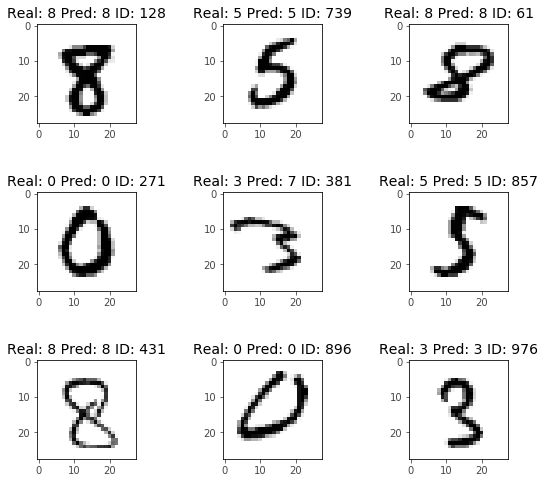

In [29]:
%matplotlib inline
from numpy.random import seed
seed(110)

# choose some ids
sample_ids = np.random.randint(0, high=1000, size=(9, ))

# prediction
predictions = network.predict(x_test_images[sample_ids])

n = len(sample_ids)
indices = np.arange(n, dtype=int)


# plot
load_rcparams((10, 8))

fig = plt.figure()
axes = (fig.add_subplot(331), fig.add_subplot(332), fig.add_subplot(333),
       fig.add_subplot(334), fig.add_subplot(335), fig.add_subplot(336),
       fig.add_subplot(337), fig.add_subplot(338), fig.add_subplot(339),)

for pred_id, ax, sample_id in zip(indices, axes, sample_ids):
    
    sample_image = test_images[sample_id]      # shape (28, 28)
    sample_label = test_labels[sample_id]      # scalar (real class)

    pred_onehot  = predictions[pred_id]        # prediction in one-hot encoding
    pred_label   = pred_onehot.argmax()        # scalar (predicted class) 
    
    ax.set_title("Real: %d Pred: %d ID: %d" % (sample_label, pred_label, sample_id))
    ax.imshow(sample_image, cmap=plt.cm.binary)
    
# adjust margins
fig.subplots_adjust(
                    hspace=0.7,
                    wspace=0.0
                    )
plt.show()

# 5. Convolutional Neural Network

Here, one of the test samples was classified incorrectly. The sample 381 is a 3 but it was classified as a 7.

# 5. Dealing with overfitting

usar dropout



In [31]:
# network arquitecture
drop_network = models.Sequential()
drop_network.add(layers.Dense(512, activation="relu", input_shape=(28*28, )))
drop_network.add(layers.Dropout(0.5))
drop_network.add(layers.Dense(10, activation="softmax"))

# compilation
drop_network.compile(optimizer="rmsprop",
                loss="categorical_crossentropy",
                metrics=["accuracy"],                
                )

# train
drop_history = drop_network.fit(x_train_images, y_train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.3170 - acc: 0.9071
Epoch 2/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.1552 - acc: 0.9538
Epoch 3/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.1191 - acc: 0.9639
Epoch 4/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0993 - acc: 0.9704
Epoch 5/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0883 - acc: 0.9736


In [32]:
# history from network
hist_dict = history.history

# evaluate performance
test_loss, test_acc = drop_network.evaluate(x_test_images, y_test_labels)

print("train loss: %.4f" % hist_dict["loss"][-1])   # loss in the last epoch
print("test  loss: %.4f" % test_loss)
print("difference: %.4f" % (np.abs(hist_dict["loss"][-1] - test_loss,)))
print("")

print("train acc:  %.4f" % hist_dict["acc"][-1])    # accuracy in the last epoch
print("test  acc:  %.4f" % test_acc)
print("difference: %.4f" % (hist_dict["acc"][-1] - test_acc),)

10000/10000 [==============================] - 0s 47us/step
train loss: 0.0098
test  loss: 0.0741
difference: 0.0643

train acc:  0.9972
test  acc:  0.9788
difference: 0.0184


From these results, it seems that using dropout deteriorates the performance of the network. From previous results, we achieved **98.2% of accuracy in the test set is 98.2%**. Now, using dropout, we achieved 97.5%. Although, the difference between test and train accuracy is lower using dropout.

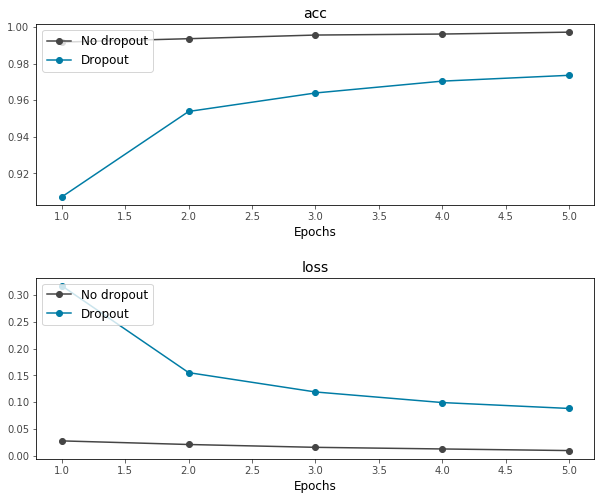

In [34]:
%matplotlib inline

load_rcparams((10, 8))

fig = plt.figure()
axes = (fig.add_subplot(211), fig.add_subplot(212))
indicators = ("acc", "loss")
colors = ["#454545", "#007ca5", "#A91458"]

# history from networks
hist_dict = history.history
hist_dict_drop = drop_history.history

for i, ax, indicator in zip((0, 1), axes, indicators):
    
    ax.cla()
    
    y      = hist_dict[indicator]   # performance of network without dropout
    y_drop = hist_dict_drop[indicator]   # performance of network using dropout
    x      = np.arange(1, len(y)+1)
    
    ax.set_title(indicator)
    ax.set_xlabel("Epochs")
    ax.plot(x, y, marker="o", c=colors[0], label="No dropout")
    ax.plot(x, y_drop, marker="o", c=colors[1], label="Dropout")
    
    ax.legend(loc="upper left")
    
# adjust margins
fig.subplots_adjust(
                    hspace=0.4,
                    )
    
plt.show()

From previous figures, we can see that when using dropout, the learning process is slower. Maybe, this is not the best example to show the effectiveness of using dropout.

# 6. Conclusions


**Data preprocessing**

Data preprocessing aims at making the raw data at hand more amenable to neural networks. This includes vectorization, normalization, handling missing values, and feature extraction.

- **Vectorization** All inputs and targets in a neural network must be tensors (i.e., multidimensional matrices) of floating-point data (or, in specific cases, tensors of integers). Whatever data you need to process (e.g., sound, images, text), you must first turn into tensors, a step called *data vectorization*.

- **Value normalization** In the digit classification example, you started from image data encoded as integers in the [0, 255] range, encoding grayscale values. Before you fed this data into your network, you had to cast it to `float32` and divide by `255` so you'd end up with floating-point values in the [0, 1] range. In the case of predicting house prices, you had to normalize each feature independently so that is had a standard deviation of 1 and mean of 0. The following stricter normalization practice is common and can help, although is not always necessary (for instance, it was not employed in the digit-classification example):

```python
# assuming the shape of x is (m_samples, n_features)
x -= x.mean(axis=0)   # get the mean of each feature
x /= x.std(axis=0)    # get the standard deviation of each feature
```

In general, it is not safe to feed into a neural network data that takes relatively large values (for example, multidigit integers, which are much larger than the initial values taken by the weights of a network) or data that is heterogeneous (for instance, data where one feature is in the range [0, 1] and another is in the range [100, 200]). **Doing so can trigger large gradient updates that will prevent the network from converging**. To make learning easier for your network, your data should have the following characteristics:


- Take small values.  Typically, most values should be in the range [0, 1].
- Be homogeneous. That is, all features should take values in roughly the same range.

## References

- [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python).